In [ ]:
import os
import numpy as np
import pandas as pd
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib

In [ ]:
zipref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/data/weather.zip', 'r')
zipref.extractall('/tmp')
zipref.close()

In [ ]:
hail = '/tmp/dataset/hail'
rainbow = '/tmp/dataset/rainbow'
frost = '/tmp/dataset/frost'
rime = '/tmp/dataset/rime'
fogsmog = '/tmp/dataset/fogsmog'
snow = '/tmp/dataset/snow'
rain = '/tmp/dataset/rain'
glaze = '/tmp/dataset/glaze'
lightning = '/tmp/dataset/lightning'
sandstorm = '/tmp/dataset/sandstorm'
dew = '/tmp/dataset/dew'

In [ ]:
len(os.listdir(hail))+len(os.listdir(frost))
#kategori = ['rain', 'snow', 'rainbow']

1066

In [ ]:
a = os.listdir(rain)
b = int(len(os.listdir(rain))*0.8)
c= a[0:b]

for i in c:
  dari = os.path.join(rain, i)
  ke = os.path.join('/tmp/weather/train/rain', i)
  os.renames(dari, ke)

a = os.listdir(rain)
for i in a:
  dari = os.path.join(rain, i)
  ke = os.path.join('/tmp/weather/val/rain', i)
  os.renames(dari, ke)

In [ ]:
a = os.listdir(snow)
b = int(len(os.listdir(snow))*0.8)
c= a[0:b]

for i in c:
  dari = os.path.join(snow, i)
  ke = os.path.join('/tmp/weather/train/snow', i)
  os.renames(dari, ke)

a = os.listdir(snow)
for i in a:
  dari = os.path.join(snow, i)
  ke = os.path.join('/tmp/weather/val/snow', i)
  os.renames(dari, ke)

In [ ]:
a = os.listdir(rainbow)
b = int(len(os.listdir(rainbow))*0.8)
c= a[0:b]

for i in c:
  dari = os.path.join(rainbow, i)
  ke = os.path.join('/tmp/weather/train/rainbow', i)
  os.renames(dari, ke)

a = os.listdir(rainbow)
for i in a:
  dari = os.path.join(rainbow, i)
  ke = os.path.join('/tmp/weather/val/rainbow', i)
  os.renames(dari, ke)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range= 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/tmp/weather/train',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
)

validation_generator = test_datagen.flow_from_directory(
    '/tmp/weather/val',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 1101 images belonging to 3 classes.
Found 278 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
                                    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=15,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=1,
    callbacks=[callbacks])

Epoch 1/20
15/15 [==============================] - 38s 2s/step - loss: 1.1242 - accuracy: 0.4230 - val_loss: 1.0226 - val_accuracy: 0.3938
Epoch 2/20
15/15 [==============================] - 37s 2s/step - loss: 0.8874 - accuracy: 0.5401 - val_loss: 0.7385 - val_accuracy: 0.7312
Epoch 3/20
15/15 [==============================] - 36s 2s/step - loss: 0.7210 - accuracy: 0.6790 - val_loss: 0.6486 - val_accuracy: 0.6687
Epoch 4/20
15/15 [==============================] - 34s 2s/step - loss: 0.7009 - accuracy: 0.6876 - val_loss: 0.6968 - val_accuracy: 0.7125
Epoch 5/20
15/15 [==============================] - 35s 2s/step - loss: 0.6660 - accuracy: 0.7072 - val_loss: 0.7977 - val_accuracy: 0.6313
Epoch 6/20
15/15 [==============================] - 35s 2s/step - loss: 0.6912 - accuracy: 0.6508 - val_loss: 0.4953 - val_accuracy: 0.8125
Epoch 7/20
15/15 [==============================] - 34s 2s/step - loss: 0.5055 - accuracy: 0.8026 - val_loss: 0.5528 - val_accuracy: 0.8000
Epoch 8/20
15/15 [==

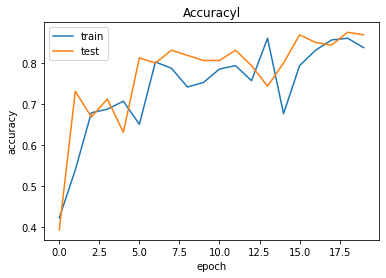

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracyl')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

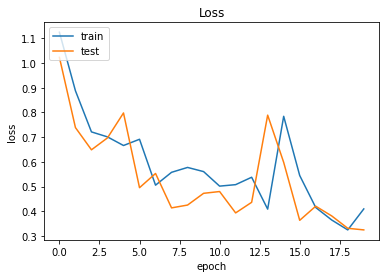

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

54126960